In [29]:
%%capture
!rm -rf data/*
!unzip data.zip -d data/
!pip install --no-cache-dir pyldavis
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyLDAvis
import pyLDAvis.sklearn
import pickle
import glob
import xml.etree.ElementTree as ET
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import random
import scipy
%matplotlib inline

In [2]:
#list of all article xml file pathenames
all_files = glob.glob('GodesData/GodesLadyBook_ProcDocs/*.xml')

#for filename in all_files:
    #print(filename)

In [ ]:
type(all_files[0]) #all files is an array of strings
len(all_files)

In [ ]:
tree = ET.ElementTree(file='GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO1830070051.00051.proc.xml')
root = tree.getroot()
body = root.find('body')
body_children = body.getchildren()
body_children
for val_child in body_children:
    print("new child ")
    print(val_child)
    vkids = val_child.getchildren()
    for k in vkids:
        print(k)
        print("tail : ")
        print(k.tail)
    #print(val_child)
    #print( vkids)
#br/ is just one line and doesn't have an end tag            

In [ ]:
tre = ET.ElementTree(file='GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO1865120055.08276.proc.xml')
rot = tre.getroot()
boy = rot.find('body')
boy_children = boy.getchildren()

for val_child in boy_children:
    kids = val_child.getchildren()
    for k in kids:
        print(k)
        print("tail : ")
        print(k.tail)

In [ ]:
tr = ET.ElementTree(file='GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO1863060051.06214.proc.xml')
rt = tr.getroot()
by = rt.find('body')
by_children = by.getchildren()
by_children
by_children
for val_child in by_children:
    kids = val_child.getchildren()
    for k in kids:
        print(k)
        print("tail : ")
        print(k.tail)
    #print(val_child)
         #print(val_kids)
    #print(val_kids)


In [ ]:
rt.find('article-meta').find('publication-date').text
rt.find('article-meta').find('article-title').text


In [ ]:
tree 

In [ ]:
tr

In [3]:
eTree_arr = make_array()
index = 0
pathNames = all_files
dates = make_array()
article_titles = make_array()
#make a table of pathname, date, article titles
for path_name in all_files:
    eTree_xml = ET.ElementTree(file = path_name)
    #with open(path_name) as f:
        #xml_file= ET.fromstring(f.read().encode())
    #how to get each etree separarely, it's not reading a full xml file as 1 et, it's splitting it up 
    #print(str(index) + " " + xml_file.tag)
    eTree_arr = np.append(eTree_arr, eTree_xml)
    date = eTree_xml.getroot().find('article-meta').find('publication-date').text
    article_title = eTree_xml.getroot().find('article-meta').find('article-title').text
    dates = np.append(dates, date)
    article_titles = np.append(article_titles, article_title.lower())

    

#etree_arr is an array of all xml etrees

In [4]:
len(eTree_arr)

6300

In [ ]:
len(dates)

In [ ]:
len(article_titles)

In [5]:
years = make_array()


for date_string in dates:
    arr =  [int(s) for s in date_string.split() if s.isdigit()]
    year = arr[0]
    years = np.append(years, year)
   #print(arr)
   #print(len(date_string))
   #year_string =(date_string.split(','))[1].strip()
   
  # year = int(year_string)
   #print(type(year))
    #ears = np.append(years, year)


len(years)


6300

In [6]:
meta_table = Table().with_columns(
    'Article Title', article_titles,
    'Date', dates,
    'Year', years,
    'ETrees', eTree_arr,
    'Pathname', pathNames)
meta_table
#the articles already seem to be in random order and not organized by date

Article Title,Date,Year,ETrees,Pathname
"imposters about.— a woman calling herself ""addie craven, ""","April, 1865",1865,,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO18650 ...
infant's slipper,"November, 1850",1850,,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO18501 ...
fancy belt,"April, 1861",1861,,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO18610 ...
our musical column,"June, 1863",1863,,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO18630 ...
fetching the doctor,"June, 1863",1863,,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO18630 ...
"butterflies for collars, cuffs, and handkerchiefs. name ...","June, 1865",1865,,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO18650 ...
coatee dress,"February, 1865",1865,,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO18650 ...
written for the lady's book.,"April, 1840",1840,,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO18400 ...
superior card photographs for albums. 8,"May, 1865",1865,,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO18650 ...
large country residence in the italian style,"May, 1861",1861,,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBOOK.GO18610 ...


In [ ]:
meta_table.group('Year')
#should I only choose 350 random articles from each of the later years, to be able to compare the years; so i have the similar number of articles? 
#so there's not so much of weight of the later years

In [7]:
#now put all the contents into 1 big list of strings
total_content_strings = []
for eTree in eTree_arr:
    root = eTree.getroot()
    body = root.find('body')
    body_children = body.getchildren()
    for val_child in body_children:
        
        vkids = val_child.getchildren()
        for k in vkids:
            content = k.tail
            total_content_strings.append(content)
        
    

In [ ]:
len(total_content_strings)

In [ ]:
for i in total_content_strings:
    #takes wayy too long, over 8 min
    print(i)

In [8]:
#get rid of all the "None" values
count = 0
final_strings = []
for i in total_content_strings:
    if i!= None and i != '\n':
        final_strings.append(i)



In [ ]:
type(final_strings)

In [ ]:
len(final_strings)

In [9]:
count_vect = CountVectorizer(max_features=5000, stop_words='english', max_df=0.80, min_df=5)
random.shuffle(final_strings) #shuffle the final strings list
train_strings = final_strings[:71860]
test_strings = final_strings[71860:]

In [ ]:
train_strings[:10]

In [10]:
dtm = count_vect.fit_transform(train_strings)
dtm_feature_names = count_vect.get_feature_names()
dtm_feature_names[:10]


['00', '000', '10', '10th', '11', '11th', '12', '12th', '13', '13th']

In [ ]:
len(dtm_feature_names)

In [ ]:
#dtm_tb = Table(dtm_feature_names).with_rows(dtm.toarray())  dont need
#dtm_tb.show(5) 

In [ ]:
#from sklearn.decomposition import LatentDirichletAllocation


In [11]:
lda = LatentDirichletAllocation(n_components=7, max_iter=5)
np.random.seed(0)

In [12]:
lda_model = lda.fit(dtm)

/srv/app/venv/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [13]:
pickle.dump((lda, lda_model, dtm, count_vect), open('7-topics.pkl', 'wb'))
lda, lda_model, dtm, count_vect = pickle.load(open('7-topics.pkl', 'rb'))
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, dtm, count_vect)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
4      20.563593        1       1 -0.168430 -0.107132
3      15.798429        1       2  0.013054 -0.069300
0      15.469155        1       3 -0.199342  0.028240
6      13.719115        1       4 -0.222564  0.191993
1      12.655789        1       5  0.232870 -0.042338
5      12.561641        1       6  0.097053 -0.275715
2       9.232278        1       7  0.247359  0.274252, topic_info=     Category         Freq      Term        Total  loglift  logprob
term                                                               
2485  Default  2700.000000      know  2700.000000  30.0000  30.0000
2718  Default  2730.000000       man  2730.000000  29.0000  29.0000
2843  Default  2892.000000      miss  2892.000000  28.0000  28.0000
3928  Default  2181.000000      sent  2181.000000  27.0000  27.0000
4875  Default  2641.000000     white  2641.000000  26.0000  26.0000
2497  Default  2154.000000      lady  2154.000000  25.0000  25.0000
3975  Default  2299.000000     shall  2299.000000  24.0000  24.0000
3830  Default  5351.000000      said  5351.000000  23.0000  23.0000
2118  Default  2798.000000     heart  2798.000000  22.0000  22.0000
2976  Default  2644.000000       new  2644.000000  21.0000  21.0000
4939  Default  2215.000000      work  2215.000000  20.0000  20.0000
878   Default  2230.000000      come  2230.000000  19.0000  19.0000
4507  Default  2049.000000     think  2049.000000  18.0000  18.0000
3060  Default  2823.000000       old  2823.000000  17.0000  17.0000
489   Default  1950.000000     black  1950.000000  16.0000  16.0000
2582  Default  2893.000000      life  2893.000000  15.0000  15.0000
530   Default  1672.000000      book  1672.000000  14.0000  14.0000
2712  Default  2765.000000      make  2765.000000  13.0000  13.0000
2674  Default  2740.000000      love  2740.000000  12.0000  12.0000
1330  Default  1832.000000     dress  1832.000000  11.0000  11.0000
2907  Default  3677.000000        mr  3677.000000  10.0000  10.0000
4519  Default  2030.000000   thought  2030.000000   9.0000   9.0000
2888  Default  2354.000000    mother  2354.000000   8.0000   8.0000
2179  Default  2226.000000      home  2226.000000   7.0000   7.0000
1228  Default  2781.000000       did  2781.000000   6.0000   6.0000
2908  Default  4186.000000       mrs  4186.000000   5.0000   5.0000
1298  Default  1643.000000       don  1643.000000   4.0000   4.0000
4040  Default  1540.000000      silk  1540.000000   3.0000   3.0000
3058  Default  1589.000000        oh  1589.000000   2.0000   2.0000
4552  Default  3910.000000      time  3910.000000   1.0000   1.0000
...       ...          ...       ...          ...      ...      ...
3261   Topic7   667.642174    placed   668.503917   2.3812  -4.8621
4275   Topic7   622.013150  stitches   622.870328   2.3811  -4.9329
3793   Topic7   616.011824       row   616.869823   2.3811  -4.9426
4273   Topic7   608.843538    stitch   609.700859   2.3811  -4.9543
223    Topic7   548.154023    answer   549.014652   2.3809  -5.0593
3898   Topic7   533.658938    second   534.520457   2.3809  -5.0861
4935   Topic7   519.742188      wool   520.600057   2.3808  -5.1125
284    Topic7   494.340328       art   495.200261   2.3807  -5.1626
2026   Topic7   494.398167    ground   495.260086   2.3807  -5.1625
3329   Topic7   431.604841  position   432.466662   2.3805  -5.2983
28     Topic7   426.309171        25   427.166656   2.3805  -5.3107
3822   Topic7   421.525518       sad   422.387772   2.3804  -5.3220
3809   Topic7   415.522177       run   416.382848   2.3804  -5.3363
1052   Topic7   413.140456     cried   414.000597   2.3804  -5.3421
4940   Topic7   409.812807    worked   410.671939   2.3804  -5.3502
3889   Topic7   384.218052      seam   385.075616   2.3802  -5.4146
1589   Topic7   377.589654   express   378.450925   2.3802  -5.4320
3657   Topic7   369.400287    repeat   370.258552   2.3801  -5.4540
313

In [14]:
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(topic_idx, " ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

In [15]:
display_topics(lda, dtm_feature_names, 20)

0 said man mr woman hope child knew best wife better right family course looking far hand mrs say sir sure
1 white black dress silk hair velvet light blue trimmed green flowers form round lace small paper gold large ribbon style
2 sent lady miss work book make mrs pattern end ve chain number knit got price cents piece placed stitches row
3 little thought time night look make room mind long head words till day good great air miss aunt place feel
4 heart old new mother home eyes face father came young day little years said good did girl looked evening voice
5 half water hour good used add rest women fine year pound spirit great known pleasure large taste business butter let
6 know shall come life think love like don oh mrs did dear time just tell ll say yes let true


In [16]:
doc_topic = lda.transform(dtm)
list_of_doctopics = [doc_topic[n] for n in range(len(doc_topic))]
list_of_doctopics[71859] # propotion of each topic in the certain article number given, only till length of train_strings given into dtm, which is half

array([ 0.35410383,  0.00795186,  0.12126523,  0.23761263,  0.18260708,
        0.00794103,  0.08851834])

In [17]:
df = pd.DataFrame(list_of_doctopics)
df.head(n=5) # columns are topics and rows are documents/articles, shows probabilty of each topic in a document, we just show the first 5 documents here

,0,1,2,3,4,5,6
0,0.035714,0.035714,0.285713,0.035714,0.035714,0.035714,0.535715
1,0.047619,0.047619,0.047619,0.047619,0.714286,0.047619,0.047619
2,0.005736,0.005715,0.005714,0.005718,0.005753,0.929071,0.042292
3,0.020421,0.020413,0.020414,0.877449,0.020417,0.020411,0.020474
4,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.785714


In [18]:
meta = meta_table.to_df() 
meta[df.columns] = df  #our df is made from doctopics that in total are half of the length of meta_table> how is this still working?
meta

,Article Title,Date,Year,ETrees,Pathname,0,1,2,3,4,5,6
0,"imposters about.— a woman calling herself ""ad...","April, 1865",1865.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.035714,0.035714,0.285713,0.035714,0.035714,0.035714,0.535715
1,infant's slipper,"November, 1850",1850.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.047619,0.047619,0.047619,0.047619,0.714286,0.047619,0.047619
2,fancy belt,"April, 1861",1861.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.005736,0.005715,0.005714,0.005718,0.005753,0.929071,0.042292
3,our musical column,"June, 1863",1863.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.020421,0.020413,0.020414,0.877449,0.020417,0.020411,0.020474
4,fetching the doctor,"June, 1863",1863.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.785714
5,"butterflies for collars, cuffs, and handkerchi...","June, 1865",1865.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.714286
6,coatee dress,"February, 1865",1865.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.023810,0.023810,0.023810,0.023841,0.523771,0.023884,0.357075
7,written for the lady's book.,"April, 1840",1840.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.254493,0.142852,0.142860,0.017857,0.267903,0.017861,0.156173
8,superior card photographs for albums. 8,"May, 1865",1865.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.023823,0.023810,0.690433,0.023810,0.023819,0.190464,0.023842
9,large country residence in the italian style,"May, 1861",1861.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.003982,0.003969,0.108826,0.003971,0.003974,0.871307,0.003971


In [19]:
meta.corr()

,Year,0,1,2,3,4,5,6
Year,1.000000,-0.014040,0.009532,0.008836,0.006835,0.009393,-0.033477,0.006446
0,-0.014040,1.000000,-0.232173,-0.172395,-0.102777,-0.144662,-0.158381,-0.126464
1,0.009532,-0.232173,1.000000,-0.057661,-0.192206,-0.223233,-0.124885,-0.238713
2,0.008836,-0.172395,-0.057661,1.000000,-0.215959,-0.231738,-0.107932,-0.172141
3,0.006835,-0.102777,-0.192206,-0.215959,1.000000,-0.151889,-0.051735,-0.173406
4,0.009393,-0.144662,-0.223233,-0.231738,-0.151889,1.000000,-0.193667,-0.192454
5,-0.033477,-0.158381,-0.124885,-0.107932,-0.051735,-0.193667,1.000000,-0.202748
6,0.006446,-0.126464,-0.238713,-0.172141,-0.173406,-0.192454,-0.202748,1.000000


In [20]:


years1860_on = meta[ meta['Year'] > 1859 ]
#&& meta['Year'] < 1861


years1860_on


,Article Title,Date,Year,ETrees,Pathname,0,1,2,3,4,5,6
0,"imposters about.— a woman calling herself ""ad...","April, 1865",1865.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.035714,0.035714,0.285713,0.035714,0.035714,0.035714,0.535715
2,fancy belt,"April, 1861",1861.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.005736,0.005715,0.005714,0.005718,0.005753,0.929071,0.042292
3,our musical column,"June, 1863",1863.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.020421,0.020413,0.020414,0.877449,0.020417,0.020411,0.020474
4,fetching the doctor,"June, 1863",1863.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.785714
5,"butterflies for collars, cuffs, and handkerchi...","June, 1865",1865.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.714286
6,coatee dress,"February, 1865",1865.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.023810,0.023810,0.023810,0.023841,0.523771,0.023884,0.357075
8,superior card photographs for albums. 8,"May, 1865",1865.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.023823,0.023810,0.690433,0.023810,0.023819,0.190464,0.023842
9,large country residence in the italian style,"May, 1861",1861.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.003982,0.003969,0.108826,0.003971,0.003974,0.871307,0.003971
10,the casket of temperance,"February, 1864",1864.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.714259,0.047619,0.047619,0.047619,0.047619,0.047635,0.047631
11,letter to the editress. new york,"May, 1864",1864.0,<xml.etree.ElementTree.ElementTree object at 0...,GodesData/GodesLadyBook_ProcDocs/GODEYSLADYSBO...,0.035714,0.035747,0.035736,0.035714,0.035714,0.035719,0.785655


In [ ]:
type(meta.plot)

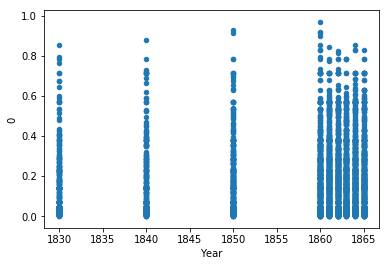

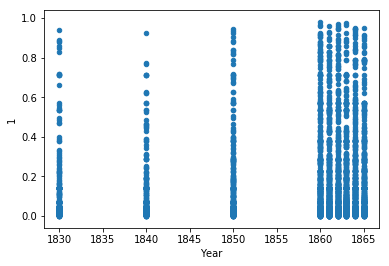

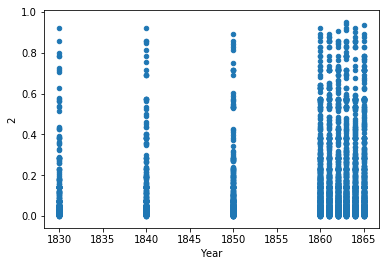

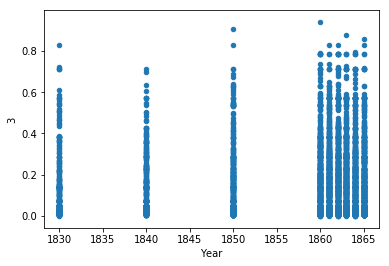

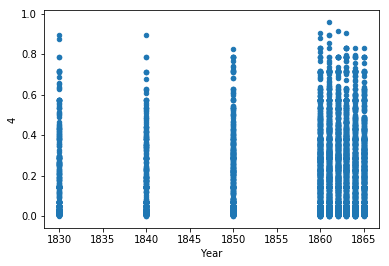

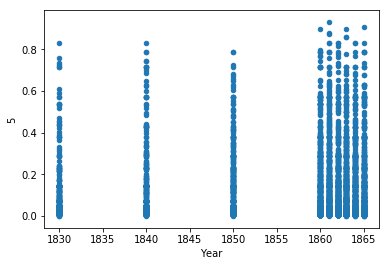

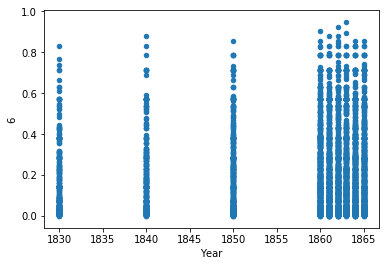

In [21]:
for i in np.arange(7):
    meta.plot.scatter(x='Year', y=i)

In [ ]:
#axes = plt.gca()
#axes.set_xlim([1859,1866])
#axes.set_ylim([1860,1865])

#plt.plot(meta, np.sinc(meta), c = 'k')
#plt.show()


In [22]:
lda_model.perplexity(count_vect.transform(test_strings))
#The lower the perplexity, the better the fit of the model. 
#Unfortunately, it has been shown time and again that minimizing perplexity does not actually separate topics into coherent groups that humans would.
#perplexity is broken

2819.2682554777057

In [23]:
array_sums = make_array()
for i in np.arange(7):
    sum_for_year = sum(meta[i])
    array_sums = np.append(array_sums, sum_for_year)

array_sums 

array([  910.6752863 ,   778.85141477,   734.81974692,   897.39778165,
        1173.43810618,   721.48982565,  1083.32783852])

In [24]:
#for topic  
array_of_years = make_array(1830, 1840, 1850, 1860, 1861, 1862, 1863, 1864, 1865 )
total_list_of_prop = []
total_list_of_std = []
for i in np.arange(7):
    array_of_prop_i = make_array()
    array_of_std_i = make_array()
    for year in array_of_years:
        one_year_prop = meta[ meta['Year'] == year]
        avg_prop_for_year = np.average(one_year_prop[i])
        std_dev_for_year = np.std(one_year_prop[i])
        array_of_prop_i = np.append(array_of_prop_i, avg_prop_for_year)
        array_of_std_i = np.append(array_of_std_i, std_dev_for_year)
    total_list_of_prop.append(array_of_prop_i)
    total_list_of_std.append(array_of_std_i)
total_list_of_prop


[array([ 0.1520362 ,  0.14952938,  0.14694947,  0.14415986,  0.14552944,
         0.14212584,  0.13942268,  0.14732641,  0.14293295]),
 array([ 0.12154374,  0.10889264,  0.12339271,  0.13527179,  0.12275402,
         0.12623008,  0.11852917,  0.12644809,  0.11816918]),
 array([ 0.11495994,  0.12480901,  0.1007784 ,  0.11545749,  0.11170657,
         0.11320906,  0.1243805 ,  0.11575344,  0.12660022]),
 array([ 0.13770367,  0.13956094,  0.14275507,  0.14113233,  0.14305764,
         0.14938049,  0.1415327 ,  0.14157127,  0.14017391]),
 array([ 0.18895428,  0.16729243,  0.18510199,  0.18408377,  0.19234561,
         0.19483135,  0.18901859,  0.18547709,  0.17775254]),
 array([ 0.11867544,  0.13862058,  0.12470485,  0.11399644,  0.11485804,
         0.10147321,  0.11357149,  0.11164691,  0.11549467]),
 array([ 0.16612674,  0.17129502,  0.17631752,  0.16589832,  0.16974867,
         0.17274997,  0.17354487,  0.1717768 ,  0.17887654])]

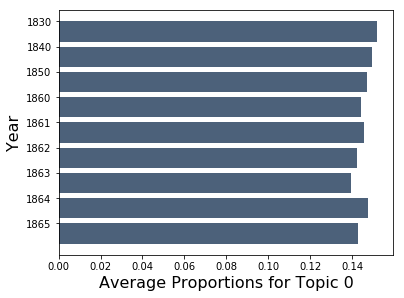

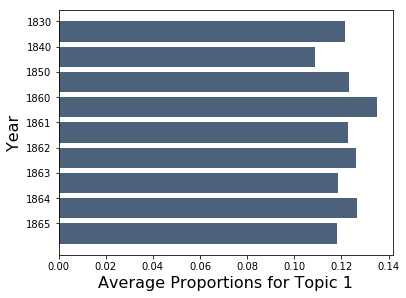

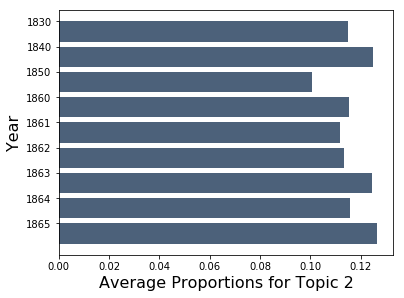

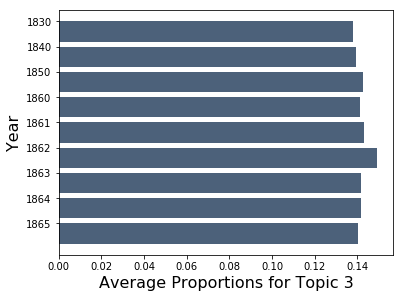

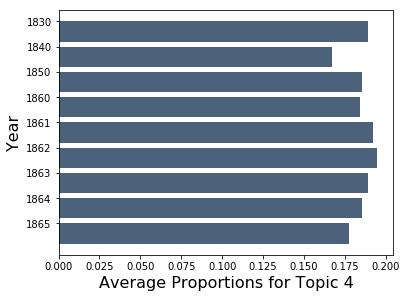

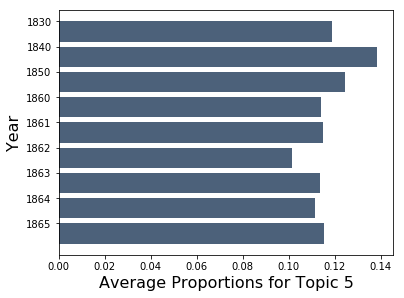

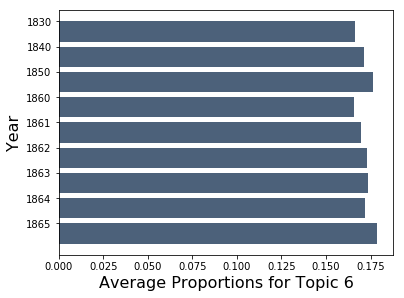

In [25]:
topic_num = 0
for arr in total_list_of_prop:
    prop_title = 'Average Proportions for Topic ' + str(topic_num)
    topic_table = Table().with_columns(
        'Year', array_of_years,
        prop_title, arr 
    
    )
    topic_table.barh('Year', prop_title)
    topic_num+=1

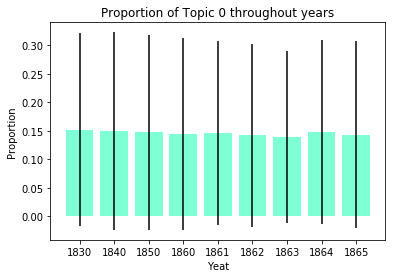

In [27]:
x = array_of_years
energy = total_list_of_prop[0]

std = total_list_of_std[0]

x_pos = [i for i, _ in enumerate(x)]
#http://benalexkeen.com/bar-charts-in-matplotlib/ 
plt.bar(x_pos, energy, color='aquamarine', yerr=std)
plt.xlabel("Yeat")
plt.ylabel("Proportion")
plt.title("Proportion of Topic 0 throughout years")

plt.xticks(x_pos, x)

plt.show()

0.18498418385481022

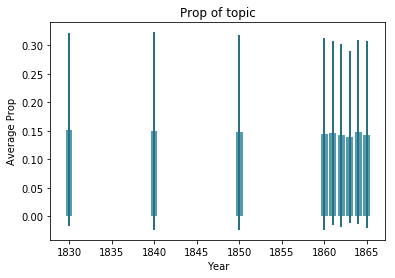

In [28]:
# Define a function for a bar plot
def barplot(x_data, y_data, error_data, x_label, y_label, title):
    _, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

#https://www.datascience.com/blog/learn-data-science-intro-to-data-visualization-in-matplotlib 
    
# Call the function to create plot
barplot(x_data = array_of_years
        , y_data = total_list_of_prop[0]
        , error_data = total_list_of_std[0]
        , x_label = 'Year'
        , y_label = 'Average Prop'
        , title = 'Prop of topic')
np.average(total_list_of_prop[4])

In [46]:


#true_mu = total_list_of_prop[0][0] #0th year 1830, 0th topic avg
#data_1860 = meta[ meta['Year'] == 1860][0] #0th topic

#https://plot.ly/python/t-test/ 
#onesample_results = scipy.stats.ttest_1samp(data_1860, true_mu)
#print(onesample_results[0], onesample_results[1])
#print(np.average(meta[ meta['Year'] == 1830][0] ))
#total_list_of_prop[0][0] 
#null hyp is that true mu = 
#pvalue 0.0327545619001, so we reject our null hup
#data_1860
#t test is to see if average of sample is equal to average of population, however here there is no population I'm comparing too, cus I'm looking at the differnt year
#print(total_list_of_prop[0][8])


test_stats = make_array()
p_values = make_array()

for i in np.arange(7):
    #true_mu = total_list_of_prop[i][0] #ith topic, year 1830
    data_1830 = meta[ meta['Year'] == 1830][i]
    data_1865 = meta[ meta['Year'] == 1865][i] #ith topic, year 1860
    twosample_results = scipy.stats.ttest_ind(data_1830, data_1865) #2sample t test
    #http://www.scipy-lectures.org/packages/statistics/index.html#student-s-t-test-the-simplest-statistical-test

    test_stats = np.append(test_stats, twosample_results[0])
    p_values = np.append(p_values, twosample_results[1])

len(test_stats )


stat_results = Table().with_columns(
    'Topic', np.arange(7),
    'Test Statistics', test_stats,
    'P-values', p_values

)
    
stat_results
#p-value is 0.05, since none of p_values are below that, we fail to reject the null hypothesis for article contents that the occurence of the topics didn't
#change too dramatically from 1830 to 1865
#these pvalues are smaller than the title ones


Topic,Test Statistics,P-values
0,0.813248,0.416252
1,0.280833,0.778891
2,-0.993237,0.320813
3,-0.233656,0.815296
4,0.88263,0.377629
5,0.307911,0.758208
6,-1.00852,0.313426


In [32]:
#perform topic modeling for the titles
title_strings = []
for article in article_titles:
    title_strings.append(article)
    
len(title_strings)

6300

In [53]:
count_vect2 = CountVectorizer(max_features=5000, stop_words='english', max_df=0.80, min_df=5)
random.shuffle(title_strings) #shuffle the title strings list
train_titles = title_strings[:3150]
test_titles = title_strings[3150:]

In [62]:
dtm2 = count_vect2.fit_transform(train_titles)
dtm_feature_names2 = count_vect2.get_feature_names()
dtm_feature_names2[:10]

['1826',
 '1840',
 '1864',
 '1865',
 '93the',
 'accepted',
 'advice',
 'agency',
 'alphabet',
 'america']

In [63]:
lda2 = LatentDirichletAllocation(n_components=8, max_iter=5)
np.random.seed(0)

In [64]:
lda_model2 = lda2.fit(dtm2)

/srv/app/venv/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [65]:
pickle.dump((lda2, lda_model2, dtm2, count_vect2), open('8 title-topics.pkl', 'wb'))
lda2, lda_model2, dtm2, count_vect2 = pickle.load(open('8 title-topics.pkl', 'rb'))
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model2, dtm2, count_vect2)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
5      14.972697        1       1 -0.130566 -0.073970
4      13.910257        1       2  0.296928 -0.091393
3      13.892171        1       3 -0.190023 -0.183910
1      12.466894        1       4 -0.051257  0.179971
2      12.011878        1       5 -0.167861 -0.042541
0      11.861230        1       6 -0.030672  0.322103
7      10.585517        1       7  0.056796 -0.114997
6      10.299356        1       8  0.216656  0.004738, topic_info=     Category        Freq           Term       Total  loglift  logprob
term                                                                  
211   Default  198.000000           lady  198.000000  30.0000  30.0000
44    Default  132.000000           book  132.000000  29.0000  29.0000
273   Default  113.000000            new  113.000000  28.0000  28.0000
124   Default   74.000000          dress   74.000000  27.0000  27.0000
131   Default   98.000000     embroidery   98.000000  26.0000  26.0000
167   Default   94.000000          godey   94.000000  25.0000  25.0000
294   Default   62.000000        pattern   62.000000  24.0000  24.0000
144   Default   67.000000       fashions   67.000000  23.0000  23.0000
387   Default   53.000000          table   53.000000  22.0000  22.0000
429   Default   58.000000        written   58.000000  21.0000  21.0000
433   Default   70.000000          young   70.000000  20.0000  20.0000
116   Default   51.000000    description   51.000000  19.0000  19.0000
249   Default   53.000000  miscellaneous   53.000000  18.0000  18.0000
103   Default   49.000000        crochet   49.000000  17.0000  17.0000
52    Default   49.000000       braiding   49.000000  16.0000  16.0000
297   Default   81.000000   philadelphia   81.000000  15.0000  15.0000
380   Default   44.000000    subscribers   44.000000  14.0000  14.0000
141   Default   47.000000          fancy   47.000000  13.0000  13.0000
277   Default   40.000000         notice   40.000000  12.0000  12.0000
210   Default   46.000000         ladies   46.000000  11.0000  11.0000
142   Default   42.000000        fashion   42.000000  10.0000  10.0000
261   Default   42.000000            mrs   42.000000   9.0000   9.0000
74    Default   38.000000          child   38.000000   8.0000   8.0000
306   Default   41.000000          plate   41.000000   7.0000   7.0000
420   Default   39.000000          woman   39.000000   6.0000   6.0000
279   Default   41.000000      novelties   41.000000   5.0000   5.0000
151   Default   40.000000      following   40.000000   4.0000   4.0000
114   Default   45.000000     department   45.000000   3.0000   3.0000
432   Default   44.000000           york   44.000000   2.0000   2.0000
75    Default   37.000000       children   37.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
277    Topic8   39.612948         notice   40.428732   2.2527  -2.8290
74     Topic8   38.049659          child   38.865513   2.2519  -2.8693
69     Topic8   32.498400        chapter   33.316593   2.2482  -3.0270
420    Topic8   38.112043          woman   39.076600   2.2481  -2.8676
128    Topic8   23.211607        editors   24.027017   2.2386  -3.3635
150    Topic8   22.183247        flowers   23.003141   2.2368  -3.4088
51     Topic8   21.846525        braided   22.663599   2.2364  -3.4241
260    Topic8   21.479088             mr   22.297974   2.2357  -3.4411
275    Topic8   16.030215          night   16.848268   2.2233  -3.7337
353    Topic8   14.625038           shoe   15.440795   2.2188  -3.8254
237    Topic8   14.282468            man   15.098445   2.2175  -3.8491
356    Topic8   14.429368           silk   15.305211   2.2142  -3.8389
181    Topic8   13.340783          heart   14.156980   2.2137  -3.9173
365    Topic8   10.422668        slipper   11.238724   2.1977  -4.1642
30     Topic8   10.140935         basket   10.957563   2.1956  -4.1916
434    To

In [66]:
display_topics(lda2, dtm_feature_names2, 20)

0 dress novelties following correspondents articles musical dresses column accepted bonnets november august home december coiffures winter july women collar sea
1 pattern crochet braiding mrs literary notices year case flower casket robe cottage pocket 93the memory pincushion handkerchief morning garden border
2 embroidery description fashion plate children steel love story toilet patchwork insertion jacket english christmas country cushion tale domestic march sonnet
3 miscellaneous fancy ladies philadelphia letters school agency day miss hair young boarding embroidery cooking hale marking letter gentleman house alphabet
4 lady book godey written composed piano forte evening wife knitting arranged baby lessons friends american puddings cakes coiffure drawing line
5 new fashions department york philadelphia chitchat patterns style health old juvenile spring french music little madame latest establishment hints demorest
6 table subscribers notice lady woman child chapter editors flowers 

In [67]:
doc_topic2 = lda2.transform(dtm2)
list_of_doctopics2 = [doc_topic2[n] for n in range(len(doc_topic2))]
list_of_doctopics2[3149] # propotion of each topic in the certain article number given, is the length of train_titles, which is half of title_strings

array([ 0.0625    ,  0.0625    ,  0.0625    ,  0.0625    ,  0.0625    ,
        0.0625    ,  0.0625    ,  0.56249999])

In [68]:
df2 = pd.DataFrame(list_of_doctopics2)
df2 # columns are topics and rows are documents/articles, shows probabilty of each topic in a document, we just show the first 5 documents here

,0,1,2,3,4,5,6,7
0,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000
1,0.025000,0.025000,0.025000,0.025000,0.825000,0.025000,0.025000,0.025000
2,0.041667,0.708333,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667
3,0.041667,0.041667,0.041667,0.375001,0.041667,0.374999,0.041667,0.041667
4,0.041667,0.041667,0.041667,0.041667,0.041667,0.708333,0.041667,0.041667
5,0.041667,0.041667,0.041667,0.708333,0.041667,0.041667,0.041667,0.041667
6,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000
7,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.781250
8,0.041667,0.041667,0.375002,0.209278,0.041667,0.207387,0.041667,0.041667
9,0.031250,0.031250,0.031250,0.031260,0.031254,0.031250,0.031250,0.781236


In [69]:
meta_titles_prev =meta_table.to_df()
meta_titles_prev[df2.columns] = df2
meta_titles = meta_titles_prev[:3150] #fixed the NaN problem

In [70]:
meta_titles.corr()

,Year,0,1,2,3,4,5,6,7
Year,1.000000,-0.016628,0.004328,-0.012160,0.021434,0.021183,-0.002137,-0.012513,-0.008073
0,-0.016628,1.000000,-0.155475,-0.123693,-0.155349,-0.148194,-0.147050,-0.133079,-0.122885
1,0.004328,-0.155475,1.000000,-0.147943,-0.129828,-0.153920,-0.162713,-0.119629,-0.129368
2,-0.012160,-0.123693,-0.147943,1.000000,-0.155568,-0.153916,-0.141354,-0.116601,-0.123260
3,0.021434,-0.155349,-0.129828,-0.155568,1.000000,-0.164201,-0.179937,-0.148064,-0.148807
4,0.021183,-0.148194,-0.153920,-0.153916,-0.164201,1.000000,-0.167658,-0.126430,-0.127993
5,-0.002137,-0.147050,-0.162713,-0.141354,-0.179937,-0.167658,1.000000,-0.151479,-0.149239
6,-0.012513,-0.133079,-0.119629,-0.116601,-0.148064,-0.126430,-0.151479,1.000000,-0.098572
7,-0.008073,-0.122885,-0.129368,-0.123260,-0.148807,-0.127993,-0.149239,-0.098572,1.000000


In [71]:
len(meta_titles.index)

3150

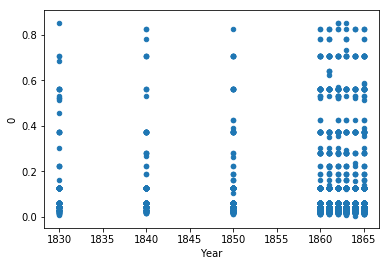

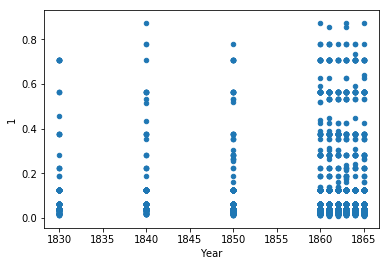

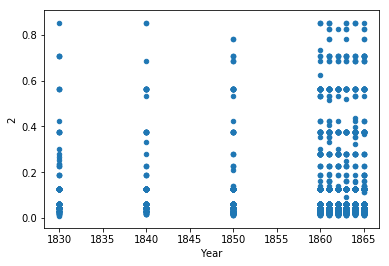

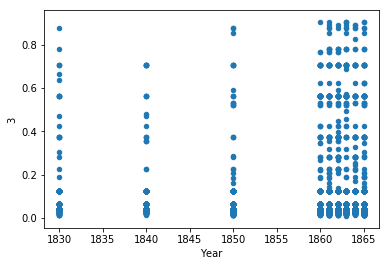

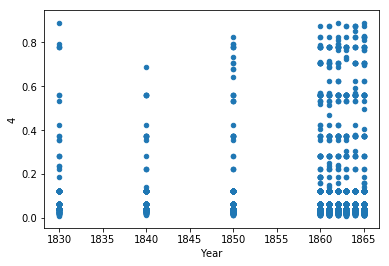

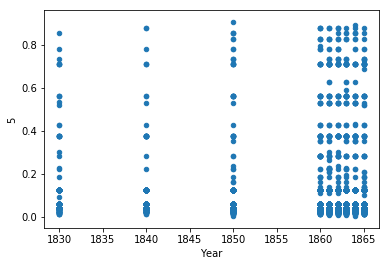

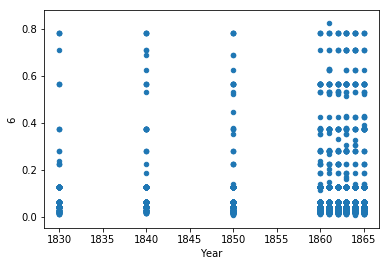

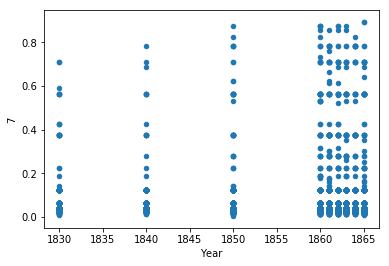

In [73]:
for i in np.arange(8):
    meta_titles.plot.scatter(x='Year', y=i)


In [75]:
#for titles  
array_of_years = make_array(1830, 1840, 1850, 1860, 1861, 1862, 1863, 1864, 1865 )
list_of_title_prop = []
for i in np.arange(8):
    array_of_prop_i = make_array()
    for year in array_of_years:
        one_year_prop = meta_titles[ meta_titles['Year'] == year]
        avg_prop_for_year = np.average(one_year_prop[i])
        array_of_prop_i = np.append(array_of_prop_i, avg_prop_for_year)
    #print(array_of_prop_i)
    list_of_title_prop.append(array_of_prop_i)
list_of_title_prop

[array([ 0.13519327,  0.13927662,  0.12349202,  0.12542967,  0.12826166,
         0.13384046,  0.11724595,  0.11763306,  0.13198319]),
 array([ 0.12740479,  0.12992295,  0.12744   ,  0.13092828,  0.14776327,
         0.12314428,  0.13246659,  0.12963699,  0.12620492]),
 array([ 0.12937928,  0.13919597,  0.12817809,  0.13292957,  0.12563614,
         0.11548332,  0.11754911,  0.12753727,  0.13627432]),
 array([ 0.13049316,  0.12086998,  0.11235045,  0.12403575,  0.12983929,
         0.14802682,  0.13617826,  0.1287436 ,  0.13510869]),
 array([ 0.11646249,  0.1033109 ,  0.12897039,  0.13278628,  0.11480409,
         0.12927457,  0.11590169,  0.13252079,  0.12947111]),
 array([ 0.13778256,  0.12363618,  0.1412652 ,  0.13289884,  0.13207007,
         0.13885452,  0.14412625,  0.13379973,  0.12191141]),
 array([ 0.10838007,  0.14115018,  0.11466783,  0.09980437,  0.10766263,
         0.10583382,  0.1304418 ,  0.12026846,  0.11009501]),
 array([ 0.11490437,  0.10263722,  0.12363602,  0.12118

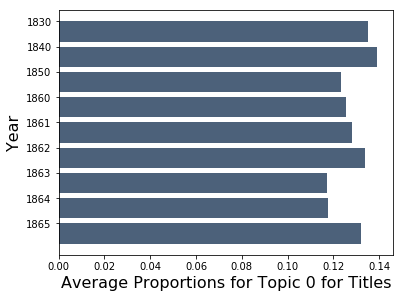

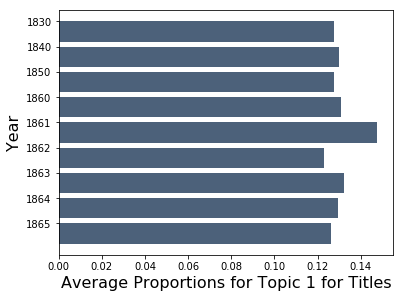

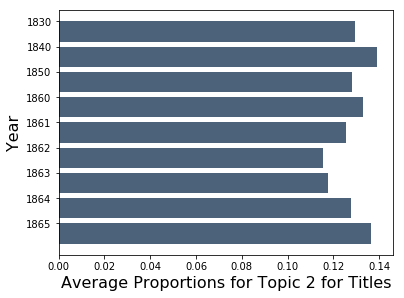

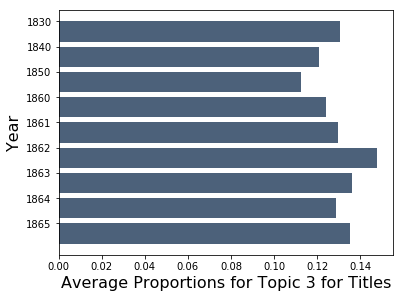

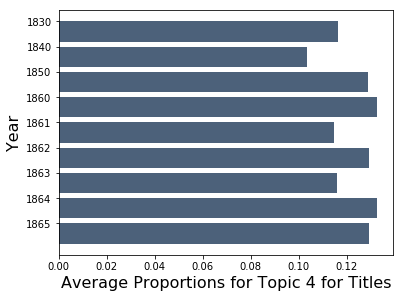

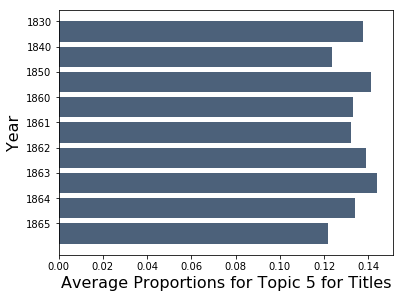

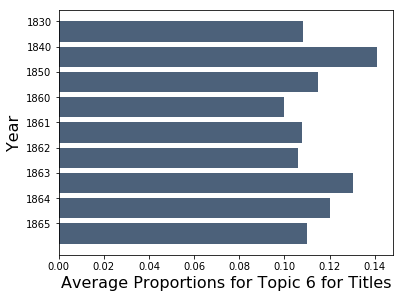

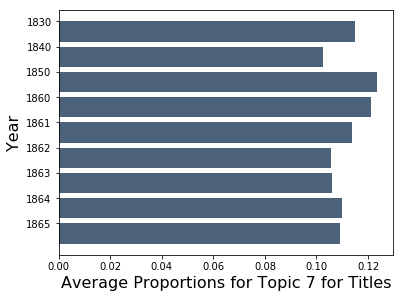

In [76]:
title_topic_num = 0
for arr in list_of_title_prop:
    prop_title = 'Average Proportions for Topic ' + str(title_topic_num) + " for Titles"
    topic_table = Table().with_columns(
        'Year', array_of_years,
        prop_title, arr 
    
    )
    topic_table.barh('Year', prop_title)
    title_topic_num+=1

In [83]:
test_title_stats = make_array()
p_title_values = make_array()

for i in np.arange(8):
    #true_mu = total_list_of_prop[i][0] #ith topic, year 1830
    data_1830 = meta_titles[ meta_titles['Year'] == 1830][i]
    data_1865 = meta_titles[ meta_titles['Year'] == 1865][i] #ith topic, year 1860
    twosample_results = scipy.stats.ttest_ind(data_1830, data_1865) #2sample t test
    #http://www.scipy-lectures.org/packages/statistics/index.html#student-s-t-test-the-simplest-statistical-test

    test_title_stats = np.append(test_title_stats, twosample_results[0])
    p_title_values = np.append(p_title_values, twosample_results[1])




stat_title_results = Table().with_columns(
    'Topic', np.arange(8),
    'Test Statistics for Titles', test_title_stats,
    'P-values for Titles', p_title_values

)
stat_title_results

#p-value is 0.05, so we fail to reject null hypthesis that occureence of topics in the titles did not change too dramatically from 1830 to 1865.

Topic,Test Statistics for Titles,P-values for Titles
0,0.190151,0.849258
1,0.0745052,0.940635
2,-0.413519,0.679382
3,-0.259695,0.795193
4,-0.738923,0.460258
5,0.943915,0.345614
6,-0.120096,0.90445
7,0.406197,0.684751
